In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv").drop("id",axis=1)

df.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


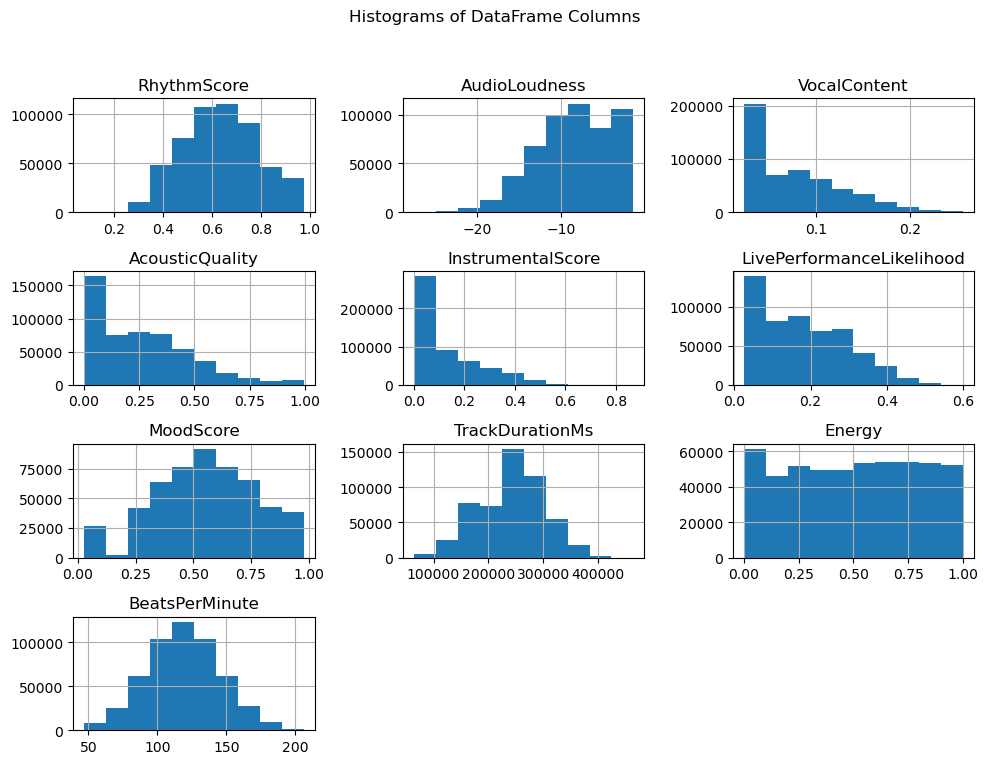

In [11]:
df.hist(figsize=(10, 8), bins=10) 
plt.suptitle('Histograms of DataFrame Columns') 
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

In [ ]:
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.drop("BeatsPerMinute", axis=1).apply(lambda x: x.corr(df.BeatsPerMinute))

In [50]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [ ]:
X = df.drop("BeatsPerMinute", axis=1)
y = df["BeatsPerMinute"]


In [ ]:
model = XGBRegressor()
scores = cross_val_score(model, X, y, cv=5,scoring='neg_mean_squared_error') # cv=5 for 5-fold cross-validation
scores = [np.sqrt(-x) for x in scores]
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.sum()/len(scores))

Cross-validation scores: [26.5509013562072, 26.6502661631697, 26.515555960775803, 26.541209305008675, 26.572434707441722]


AttributeError: 'list' object has no attribute 'mean'

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

model = XGBRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

score = np.sqrt(mean_squared_error(y_pred, y_val))

print(score)

26.53883691343268
